# Классификация клиентов банка - прогнозирование кредитной истории

## Подключение модулей

In [220]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [221]:
%matplotlib inline

In [222]:
warnings.filterwarnings('ignore')

## Загрузка данных

In [224]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df_train = pd.read_csv('train.csv', sep = ',', dtype='unicode')

In [225]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df_test = pd.read_csv('test.csv', sep = ',', dtype='unicode')

In [226]:
### В начале рассмотрим тренировачниый 

In [227]:
df_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,_,809.98,26.822619623699016,22 Years and 1 Months,No,49.57494921489417,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496005538421,NaN,No,49.57494921489417,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.60935202206993,22 Years and 3 Months,No,49.57494921489417,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377861869582354,22 Years and 4 Months,No,49.57494921489417,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,24.797346908844986,22 Years and 5 Months,No,49.57494921489417,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.26225871052017,22 Years and 6 Months,No,49.57494921489417,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,22.53759303178384,22 Years and 7 Months,No,49.57494921489417,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.8433333333328,3,...,Good,809.98,23.93379480196552,NaN,No,49.57494921489417,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986666666666,2,...,Good,605.03,24.46403063758457,26 Years and 7 Months,No,18.816214573128885,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986666666666,2,...,Good,605.03,38.550848433956325,26 Years and 8 Months,No,18.816214573128885,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


### Описание данных

Признаки:

- ID – Уникальный идентификатор для каждой записи.
- Customer_ID – Уникальный идентификатор для каждого клиента.
- Month – Месяц транзакции или записи.
- Name – Имя клиента.
- Age – Возраст клиента.
- SSN – Номер социального страхования клиента.
- Occupation – Профессия клиента.
- Annual_Income – Годовой доход клиента.
- Monthly_Inhand_Salary – Месячная заработная плата клиента.
- Num_Bank_Accounts – Общее количество банковских счетов, принадлежащих клиенту.
- Num_Credit_Card – Общее количество кредитных карт, которыми владеет клиент.
- Interest_Rate – Процентная ставка, применяемая к займам или кредитам.
- Num_of_Loan – Количество кредитов, взятых клиентом.
- Type_of_Loan – Категории кредитов, полученных клиентом.
- Delay_from_due_date – Задержка платежей по сравнению с установленной датой.
- Num_of_Delayed_Payment – Общее количество случаев просрочки платежей, совершенных клиентом.
- Changed_Credit_Limit – Корректировки, внесенные в кредитный лимит клиента.
- Num_Credit_Inquiries – Количество запросов, сделанных в отношении кредита клиента.
- Credit_Mix – Разновидности кредитов, которыми пользуется клиент (например, кредиты, кредитные карты).
- Outstanding_Debt – Общая сумма задолженности клиента на данный момент.
- Credit_Utilization_Ratio – Доля использованного кредита по сравнению с общим кредитным лимитом.
- Credit_History_Age – Продолжительность кредитной истории клиента.
- Payment_of_Min_Amount – Указывает, платит ли клиент ежемесячно минимально необходимую сумму.
- Total_EMI_per_month – Общий эквивалентный ежемесячный платеж (EMI), выплаченный клиентом.
- Amount_invested_monthly – Ежемесячная сумма инвестиций клиента.
- Payment_Behaviour – Платежные привычки и склонности клиента.
- Monthly_Balance –  Остаток на счете клиента в конце каждого месяца.

Целевой (искомый) признак:
- Credit_Score –  Кредитная оценка клиента (целевая переменная: «Хорошая», «Плохая», «Стандартная»).

## Разведочный анализ данных (РАД, EDA)

In [230]:
# объём данных (строк и столбцов - объектов и признаков)
df_train.shape

(100000, 28)

In [231]:
# выводим типы данных
df_train.dtypes

ID                          object
Customer_ID                 object
Month                       object
Name                        object
Age                         object
SSN                         object
Occupation                  object
Annual_Income               object
Monthly_Inhand_Salary       object
Num_Bank_Accounts           object
Num_Credit_Card             object
Interest_Rate               object
Num_of_Loan                 object
Type_of_Loan                object
Delay_from_due_date         object
Num_of_Delayed_Payment      object
Changed_Credit_Limit        object
Num_Credit_Inquiries        object
Credit_Mix                  object
Outstanding_Debt            object
Credit_Utilization_Ratio    object
Credit_History_Age          object
Payment_of_Min_Amount       object
Total_EMI_per_month         object
Amount_invested_monthly     object
Payment_Behaviour           object
Monthly_Balance             object
Credit_Score                object
dtype: object

In [232]:
# целевой признак - Credit_Score

In [233]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ID                        100000 non-null  object
 1   Customer_ID               100000 non-null  object
 2   Month                     100000 non-null  object
 3   Name                      90015 non-null   object
 4   Age                       100000 non-null  object
 5   SSN                       100000 non-null  object
 6   Occupation                100000 non-null  object
 7   Annual_Income             100000 non-null  object
 8   Monthly_Inhand_Salary     84998 non-null   object
 9   Num_Bank_Accounts         100000 non-null  object
 10  Num_Credit_Card           100000 non-null  object
 11  Interest_Rate             100000 non-null  object
 12  Num_of_Loan               100000 non-null  object
 13  Type_of_Loan              88592 non-null   object
 14  Delay

Признаки Name, Monthly, Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly, Monthly_Balance имеют пустые значения

Все признаки представлены в типе данных object. Необходимо привести соответсвующие парматеры к соотвутсвующему типу данных

In [236]:
# Посмотрим в процентном соотношении, сколько пропусков
for col in df_train.columns:
    print(f'Кол-во пропусков в колонке {col} = {df_train[col].isna().sum()}')

Кол-во пропусков в колонке ID = 0
Кол-во пропусков в колонке Customer_ID = 0
Кол-во пропусков в колонке Month = 0
Кол-во пропусков в колонке Name = 9985
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке SSN = 0
Кол-во пропусков в колонке Occupation = 0
Кол-во пропусков в колонке Annual_Income = 0
Кол-во пропусков в колонке Monthly_Inhand_Salary = 15002
Кол-во пропусков в колонке Num_Bank_Accounts = 0
Кол-во пропусков в колонке Num_Credit_Card = 0
Кол-во пропусков в колонке Interest_Rate = 0
Кол-во пропусков в колонке Num_of_Loan = 0
Кол-во пропусков в колонке Type_of_Loan = 11408
Кол-во пропусков в колонке Delay_from_due_date = 0
Кол-во пропусков в колонке Num_of_Delayed_Payment = 7002
Кол-во пропусков в колонке Changed_Credit_Limit = 0
Кол-во пропусков в колонке Num_Credit_Inquiries = 1965
Кол-во пропусков в колонке Credit_Mix = 0
Кол-во пропусков в колонке Outstanding_Debt = 0
Кол-во пропусков в колонке Credit_Utilization_Ratio = 0
Кол-во пропусков в колонке Credit_Histor

In [237]:
# Посмотрим на дублирующие значения
df_train.duplicated().sum()

0

Дублирующие значения отсутствуют

In [239]:
# описательная статистика для всех признаков
df_train.describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Monthly_Inhand_Salary,84998,13235,6769.13,15
Num_Bank_Accounts,100000,943,6,13001


In [240]:
# Посмотрим уникальные значения у параметра Payment_of_Min_Amount
df_train.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [241]:
# Посмотрим уникальные значения у параметра Age
df_train.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [242]:
# Посмотрим уникальные значения у параметра Credit_Mix
df_train.Credit_Mix.unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [243]:
# Посмотрим уникальные значения у параметра Occupation
df_train.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [244]:
# Посмотрим уникальные значения у параметра Month
df_train.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [245]:
# Посмотрим уникальные значения у параметра Monthly_Balance
df_train.Monthly_Balance.unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., '516.8090832742814', '319.1649785257098', '393.6736955618808'],
      dtype=object)

In [246]:
# Посмотрим уникальные значения у целевого параметра Credit_Score
df_train.Credit_Score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

### Предварительная обработка данных

In [248]:
# Для удобства будем создавать новый датафрейм
df_train_processed = pd.DataFrame()

In [249]:
# Приведём параметр Month, к типу данных int
dict_month = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4, 'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8}
df_train_processed['Short_Month'] = df_train['Month'].map(dict_month)

In [250]:
def check_to_number(x):
    if x.isdigit():
        return int(x)
    return np.nan

In [251]:
# Приведём параметр Age, к типу данных int
df_train_processed['Age'] = df_train['Age'].map(check_to_number)

In [252]:
# Просмотрим на аномальные значения параметр Age
df_train_processed.Age.describe()

count   94175.00
mean      116.68
std       690.08
min        14.00
25%        25.00
50%        33.00
75%        42.00
max      8698.00
Name: Age, dtype: float64

Есть аномальные значения, людям с кредитами не может быть меньше 18 лет и не может быть больше 100 лет. По этому заменим на всез кому меньше 18 лет, на 18 лет и кому больше 100 лет заменим на 100.

In [254]:
def check_to_age(x):
    if x < 18:  
        return 18
    elif x > 100:
        return 100
    return x

In [255]:
df_train_processed['Age'] = df_train_processed['Age'].map(check_to_age)

In [256]:
# Просмотрим на аномальные значения параметр Age
df_train_processed.Age.describe()

count   94175.00
mean       34.74
std        13.87
min        18.00
25%        25.00
50%        33.00
75%        42.00
max       100.00
Name: Age, dtype: float64

In [257]:
# Просмотрим на пустые значения параметр Age
df_train_processed.Age.isna().sum()

5825

In [258]:
# Заменим пустые значения на медианые
df_train_processed.Age.fillna(round(df_train_processed.Age.mean(), 1), inplace=True)

In [259]:
# Проверим на пустые значения параметр Age
df_train_processed.Age.isna().sum()

0

In [260]:
# изменим значения в столбце Annual_Income, в которых есть '_'
df_train_processed['Annual_Income'] = df_train['Annual_Income'].str.replace('_', '')

In [261]:
# Приведём столбец Annual_Income к численному типу
df_train_processed['Annual_Income'] = df_train_processed['Annual_Income'].astype('float')

In [262]:
# Приведём столбец Monthly_Inhand_Salary к численному типу
df_train_processed['Monthly_Inhand_Salary'] = df_train['Monthly_Inhand_Salary'].astype('float')

In [263]:
# Заполним пустые значения медианными
df_train_processed['Monthly_Inhand_Salary'].fillna(df_train_processed['Monthly_Inhand_Salary'].mean(), inplace=True) 

In [264]:
# Проверим на пустые значения
df_train_processed['Monthly_Inhand_Salary'].isna().sum()

0

In [265]:
# Приведём столюец Num_Bank_Accounts к численному типу
df_train_processed['Num_Bank_Accounts'] = df_train['Num_Bank_Accounts'].astype('float')

In [266]:
# Проверим на пустые значения
df_train_processed['Num_Bank_Accounts'].isna().sum()

0

In [267]:
# посмотрим статистику по столбцу Num_Bank_Accounts
df_train_processed['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6.00       13001
7.00       12823
8.00       12765
4.00       12186
5.00       12118
           ...  
1626.00        1
1470.00        1
887.00         1
211.00         1
697.00         1
Name: count, Length: 943, dtype: int64

Заменим данные у которых счётов больше 10 или меньше нуля на медианное значение

In [269]:
def replace_num_bank_accounts(x):
    if x < 0 or x > 10:
        return np.nan
    return x

In [270]:
df_train_processed['Num_Bank_Accounts'] = df_train_processed['Num_Bank_Accounts'].apply(replace_num_bank_accounts)

In [271]:
df_train_processed['Num_Bank_Accounts'].fillna(int(df_train_processed['Num_Bank_Accounts'].mean()), inplace=True)

In [272]:
# Преобразуем столбец Num_Credit_Card к численному типу
df_train_processed['Num_Credit_Card'] = df_train['Num_Credit_Card'].astype('int')

In [273]:
# Проверим на пустые значения 
df_train_processed['Num_Credit_Card'].isna().sum()

0

In [274]:
# Посмотрим на аномальные значения
df_train_processed['Num_Credit_Card'].describe()

count   100000.00
mean        22.47
std        129.06
min          0.00
25%          4.00
50%          5.00
75%          7.00
max       1499.00
Name: Num_Credit_Card, dtype: float64

In [275]:
# изменим значения у которых больше 10
df_train_processed['Num_Credit_Card'] = df_train_processed['Num_Credit_Card'].apply(lambda x: x if x <= 10 else np.nan)

In [276]:
df_train_processed['Num_Credit_Card'].fillna(round(df_train_processed['Num_Credit_Card'].mean(), 1), inplace=True)

In [277]:
# Приведём признак "Interest_Rate" к типу int
df_train_processed['Interest_Rate'] = df_train['Interest_Rate'].astype('int')

In [278]:
df_train_processed['Interest_Rate'] = df_train_processed['Interest_Rate'].apply(lambda x: x if x < 35 else np.nan)

In [279]:
df_train_processed['Interest_Rate'].fillna(round(df_train_processed['Interest_Rate'].mean(), 1), inplace=True)

In [280]:
# Приведём признак "Num_of_Loan" к типу int
df_train_processed['Num_of_Loan'] = df_train['Num_of_Loan'].str.replace('_', '')
df_train_processed['Num_of_Loan'] = df_train_processed['Num_of_Loan'].astype('int')
df_train_processed['Num_of_Loan'] = df_train_processed['Interest_Rate'].apply(lambda x: x if x < 10 else np.nan)
df_train_processed['Num_of_Loan'].fillna(round(df_train_processed['Num_of_Loan'].mean(), 0), inplace=True)

In [281]:
# Приведём признак "Delay_from_due_date" к типу int
df_train_processed['Delay_from_due_date'] = df_train['Delay_from_due_date'].astype('int')

In [282]:
df_train_processed['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].apply(lambda x: int(x) if str(x).isdigit() else -1)

In [283]:
df_train_processed['Num_of_Delayed_Payment'].describe()

count   100000.00
mean        27.92
std        215.82
min         -1.00
25%          7.00
50%         13.00
75%         18.00
max       4397.00
Name: Num_of_Delayed_Payment, dtype: float64

In [284]:
df_train_processed['Num_of_Delayed_Payment'] = df_train_processed['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x < 0 or x > 30 else x)

In [285]:
df_train_processed['Num_of_Delayed_Payment'].fillna(int(df_train_processed['Num_of_Delayed_Payment'].mean()), inplace=True)

In [286]:
df_train_processed['Num_of_Delayed_Payment'].describe()

count   100000.00
mean        13.38
std          5.85
min          0.00
25%         10.00
50%         13.00
75%         18.00
max         28.00
Name: Num_of_Delayed_Payment, dtype: float64

In [287]:
# Приведём признак "Changed_Credit_Limit" к типу float
df_train_processed['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].str.replace('_', '0').astype('float')

In [288]:
df_train_processed['Changed_Credit_Limit'] = df_train_processed['Changed_Credit_Limit'].apply(lambda x: x if x >= 0 else round(df_train_processed['Changed_Credit_Limit'].mean(), 2))

In [289]:
df_train_processed['Changed_Credit_Limit'].describe()

count   100000.00
mean        10.37
std          6.69
min          0.00
25%          5.33
50%          9.48
75%         14.66
max         36.97
Name: Changed_Credit_Limit, dtype: float64

In [290]:
# Изменим данные в признаке "Occupation" 
df_train_processed['Occupation'] = df_train['Occupation'].str.replace('_______', 'No occupation')

In [291]:
df_train_processed.Occupation.unique()

array(['Scientist', 'No occupation', 'Teacher', 'Engineer',
       'Entrepreneur', 'Developer', 'Lawyer', 'Media_Manager', 'Doctor',
       'Journalist', 'Manager', 'Accountant', 'Musician', 'Mechanic',
       'Writer', 'Architect'], dtype=object)

In [292]:
# Закодируем столдец Occupation
df_train_processed = df_train_processed.join(pd.get_dummies(df_train_processed['Occupation'], dtype=int))

In [293]:
df_train_processed.drop(['Occupation'], axis=1, inplace = True)

In [294]:
def replace_and_parse_float(num):
    if str(num).replace('.', '').isdigit():
        return float(num)
    else:
        return np.NaN

In [295]:
# Приведём признак "Num_Credit_Inquiries" к типу float
df_train_processed['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].apply(replace_and_parse_float)

In [296]:
df_train_processed['Num_Credit_Inquiries'] = df_train_processed['Num_Credit_Inquiries'].fillna(df_train_processed['Num_Credit_Inquiries'].mean())

In [297]:
df_train_processed['Credit_Mix'] = df_train['Credit_Mix'].replace('_', 'Good')

In [298]:
df_train_processed["Outstanding_Debt"] = df_train["Outstanding_Debt"].map(replace_and_parse_float)

In [299]:
df_train_processed.Outstanding_Debt.isna().sum()

1009

In [300]:
df_train_processed.Outstanding_Debt = df_train_processed.Outstanding_Debt.fillna(0)

In [301]:
df_train_processed["Credit_Utilization_Ratio"] = df_train["Credit_Utilization_Ratio"].map(replace_and_parse_float)

In [302]:
# Изменим данные в признаке "Credit_History_Age"  
df_train_processed['Credit_History_Age'] = df_train.Credit_History_Age.replace(np.NaN, "No writed")

In [303]:
df_train_processed['Total_EMI_per_month'] = df_train.Total_EMI_per_month.map(replace_and_parse_float)

In [304]:
df_train_processed['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].map(lambda x: float(str(x).replace('_', '')))

In [305]:
df_train_processed['Amount_invested_monthly'].fillna(0, inplace=True)

In [306]:
df_train.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [307]:
df_train[df_train['Payment_Behaviour'] == '!@9#%8'].Payment_Behaviour.count()

7600

In [308]:
df_train_processed['Payment_Behaviour'] = df_train.Payment_Behaviour.replace("!@9#%8", "Undefined")

In [309]:
df_train[df_train.Monthly_Balance.str.contains("_", na=False)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,0x367f,CUS_0x9885,February,Paul Dayl,17,186-49-9679,Developer,41086.4,3660.866666666667,3,...,Standard,113.98,34.826541222202714,11 Years and 6 Months,Yes,145.5443201837779,201.1429928919469,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Standard
26177,0xaf63,CUS_0x5a90,February,Scuffhamq,45,264-53-1943,Engineer,29728.31,2551.3591666666666,3,...,Good,917.0,38.198076080972406,31 Years and 9 Months,No,34.49644519827092,198.6115126951797,Low_spent_Large_value_payments,__-333333333333333333333333333__,Good
29158,0xc0d8,CUS_0x288d,July,Selamk,55,970-19-8342,Lawyer,30748.93,2572.410833333333,1,...,Good,860.97,40.63424987644135,19 Years and 5 Months,No,43.72777398675976,79.07180674947499,High_spent_Small_value_payments,__-333333333333333333333333333__,Standard
35570,0xe66c,CUS_0x85e9,March,Anna Driveri,45,288-62-7562,_______,20929.295_,1704.1079166666666,5,...,_,858.09,33.94362567421219,21 Years and 7 Months,No,13798.0,220.30455197823662,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
38622,0xf84c,CUS_0x2b77,July,Longstretho,21,006-36-0111,Doctor,15167.62,1471.9683333333335,4,...,Good,847.03,28.54184766239189,NaN,NM,9.930809053794937,128.87587207680795,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
60009,0x1759f,CUS_0xc06e,February,radenp,30,046-72-5387,Journalist,92114.68,7811.223333333332,3,...,Standard,820.52,39.08947537162634,20 Years and 10 Months,Yes,54.21966433694397,NaN,High_spent_Large_value_payments,__-333333333333333333333333333__,Standard
75251,0x1ceed,CUS_0x57f3,April,Kristen Haysq,29,577-85-0830,Mechanic,60904.59,NaN,3,...,Standard,2441.47,29.878715564636536,12 Years and 11 Months,Yes,61.52513971446204,394.8939566733383,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
82918,0x1fbd8,CUS_0x41bf,July,Doeringq,44,693-64-7611,Journalist,61990.52,4900.876666666666,10,...,Bad,3618.91,37.7185905591401,13 Years and 8 Months,NM,355.1433958713539,194.28348839148083,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
83255,0x1fdd1,CUS_0x2f7e,August,Sabina Zawadzkif,31,109-48-2095,Doctor,126353.04,10635.42,4,...,_,859.77,28.44286675240117,31 Years and 9 Months,No,167.04391024040052,549.7661392945339,Low_spent_Medium_value_payments,__-333333333333333333333333333__,Poor


In [310]:
df_train_processed['Monthly_Balance'] = df_train[df_train.Monthly_Balance.str.contains("_", na=False) == False].Monthly_Balance

In [311]:
df_train_processed['Monthly_Balance'] = df_train_processed['Monthly_Balance'].apply(lambda x: float(x))

In [312]:
df_train_processed['Monthly_Balance'].fillna(round(df_train_processed['Monthly_Balance'].mean(), 1), inplace=True)

In [313]:
credit_score_dict = {'Good' : 1, 'Standard' : 2, 'Poor' : 3}
df_train_processed['Credit_Score_id'] = df_train['Credit_Score'].map(credit_score_dict)

In [314]:
df_train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [315]:
df_train_processed

,Short_Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score_id
0,1,23.00,19114.12,1824.84,3.00,4.00,3.00,3.00,3,7.00,...,4.00,Good,809.98,26.82,22 Years and 1 Months,49.57,80.42,High_spent_Small_value_payments,312.49,1
1,2,23.00,19114.12,4194.17,3.00,4.00,3.00,3.00,-1,13.00,...,4.00,Good,809.98,31.94,No writed,49.57,118.28,Low_spent_Large_value_payments,284.63,1
2,3,34.70,19114.12,4194.17,3.00,4.00,3.00,3.00,3,7.00,...,4.00,Good,809.98,28.61,22 Years and 3 Months,49.57,81.70,Low_spent_Medium_value_payments,331.21,1
3,4,23.00,19114.12,4194.17,3.00,4.00,3.00,3.00,5,4.00,...,4.00,Good,809.98,31.38,22 Years and 4 Months,49.57,199.46,Low_spent_Small_value_payments,223.45,1
4,5,23.00,19114.12,1824.84,3.00,4.00,3.00,3.00,6,13.00,...,4.00,Good,809.98,24.80,22 Years and 5 Months,49.57,41.42,High_spent_Medium_value_payments,341.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.00,39628.99,3359.42,4.00,6.00,7.00,7.00,23,7.00,...,3.00,Good,502.38,34.66,31 Years and 6 Months,35.10,60.97,High_spent_Large_value_payments,479.87,3
99996,5,25.00,39628.99,3359.42,4.00,6.00,7.00,7.00,18,7.00,...,3.00,Good,502.38,40.57,31 Years and 7 Months,35.10,54.19,High_spent_Medium_value_payments,496.65,3
99997,6,25.00,39628.99,3359.42,4.00,6.00,14.50,6.00,27,6.00,...,3.00,Good,502.38,41.26,31 Years and 8 Months,35.10,24.03,High_spent_Large_value_payments,516.81,3
99998,7,25.00,39628.99,3359.42,4.00,6.00,7.00,7.00,20,13.00,...,3.00,Good,502.38,33.64,31 Years and 9 Months,35.10,251.67,Low_spent_Large_value_payments,319.16,2


## Визуальный анализ

##### Выведем статиску по признаку "Age"

In [318]:
pd.set_option('display.float_format', '{:.2f}'.format)

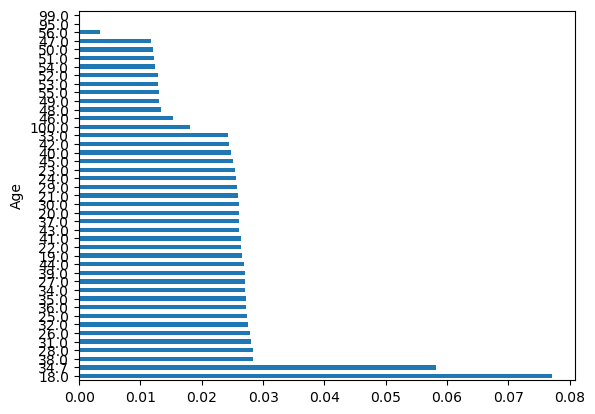

In [319]:
df_train_processed['Age'].value_counts(normalize=True).plot.barh();

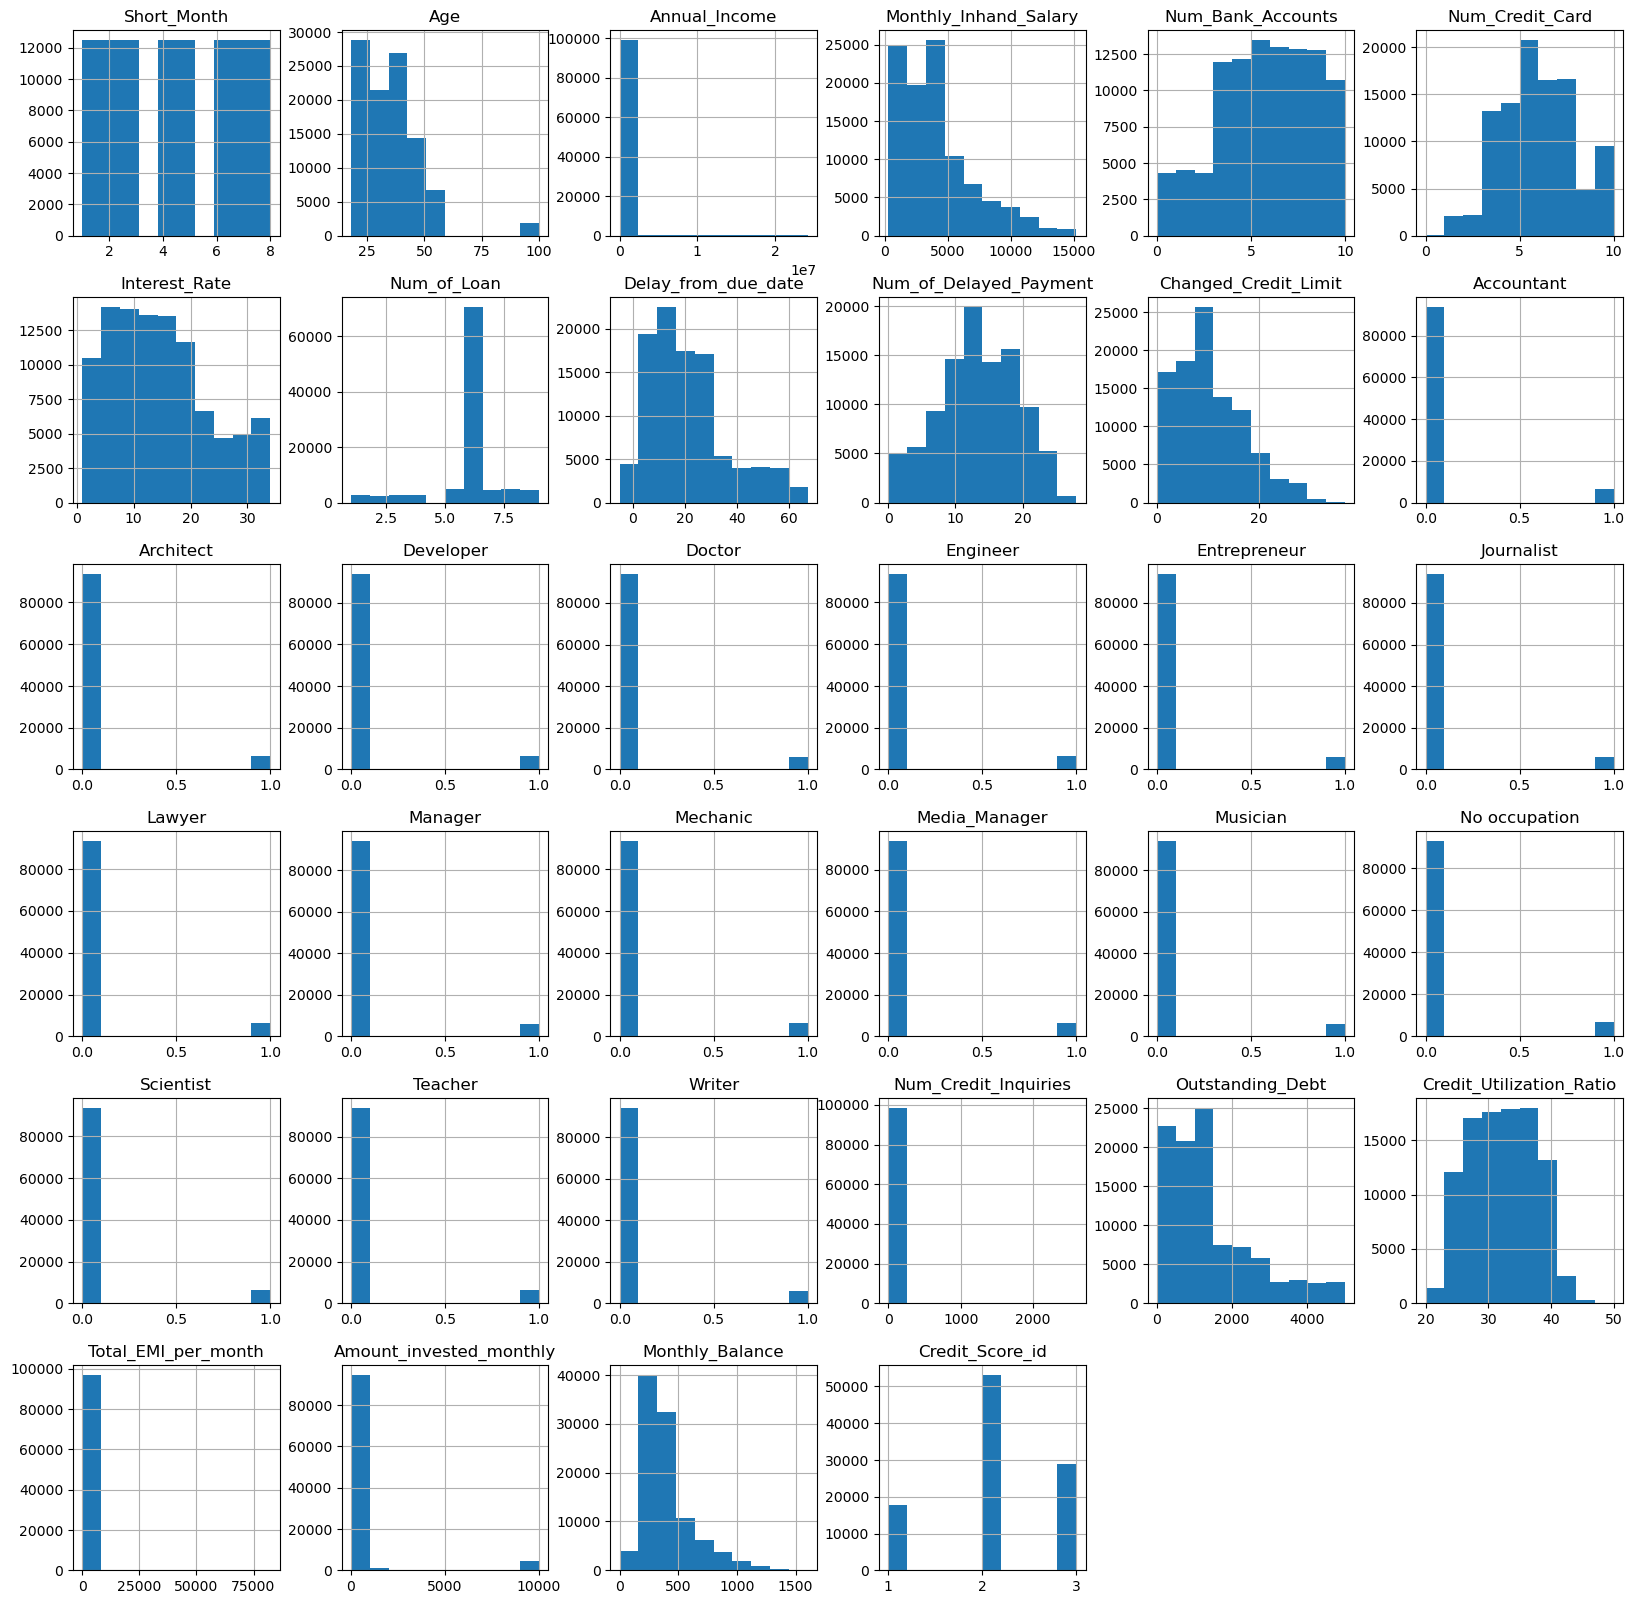

In [320]:
# Выведем гистограммы по всем признакам
df_train_processed.hist(figsize=(20,20));

## Двумерный анализ признаков

In [322]:
# матрица коррелаций
corr = df_train_processed.drop(['Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour'], axis=1).corr()
corr

,Short_Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Scientist,Teacher,Writer,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score_id
Short_Month,1.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.02
Age,0.01,1.00,0.01,0.06,-0.14,-0.10,-0.16,-0.03,-0.13,-0.12,...,0.00,-0.01,-0.00,-0.01,-0.14,0.02,0.00,0.01,0.08,-0.12
Annual_Income,-0.00,0.01,1.00,0.03,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,...,-0.00,-0.00,-0.00,0.00,-0.00,0.01,-0.00,-0.01,0.02,-0.01
Monthly_Inhand_Salary,-0.00,0.06,0.03,1.00,-0.26,-0.20,-0.28,-0.06,-0.23,-0.24,...,0.01,-0.01,0.00,-0.01,-0.25,0.16,0.01,0.06,0.64,-0.19
Num_Bank_Accounts,-0.00,-0.14,-0.01,-0.26,1.00,0.43,0.57,0.16,0.56,0.56,...,0.01,-0.00,0.01,0.01,0.50,-0.07,-0.01,-0.02,-0.29,0.39
Num_Credit_Card,-0.00,-0.10,-0.00,-0.20,0.43,1.00,0.49,0.07,0.47,0.39,...,-0.00,0.01,0.01,0.01,0.48,-0.05,-0.01,-0.01,-0.23,0.40
Interest_Rate,0.00,-0.16,-0.01,-0.28,0.57,0.49,1.00,0.26,0.58,0.53,...,-0.01,-0.00,0.01,0.01,0.62,-0.08,-0.00,-0.02,-0.32,0.48
Num_of_Loan,-0.00,-0.03,-0.00,-0.06,0.16,0.07,0.26,1.00,0.11,0.15,...,-0.00,-0.00,0.02,0.00,0.06,-0.01,-0.00,-0.00,-0.07,0.10
Delay_from_due_date,0.00,-0.13,-0.01,-0.23,0.56,0.47,0.58,0.11,1.00,0.51,...,-0.00,0.01,0.00,0.01,0.56,-0.06,-0.00,-0.01,-0.28,0.43
Num_of_Delayed_Payment,0.00,-0.12,-0.01,-0.24,0.56,0.39,0.53,0.15,0.51,1.00,...,0.01,-0.01,0.00,0.01,0.47,-0.07,-0.00,-0.02,-0.28,0.35


<Axes: >

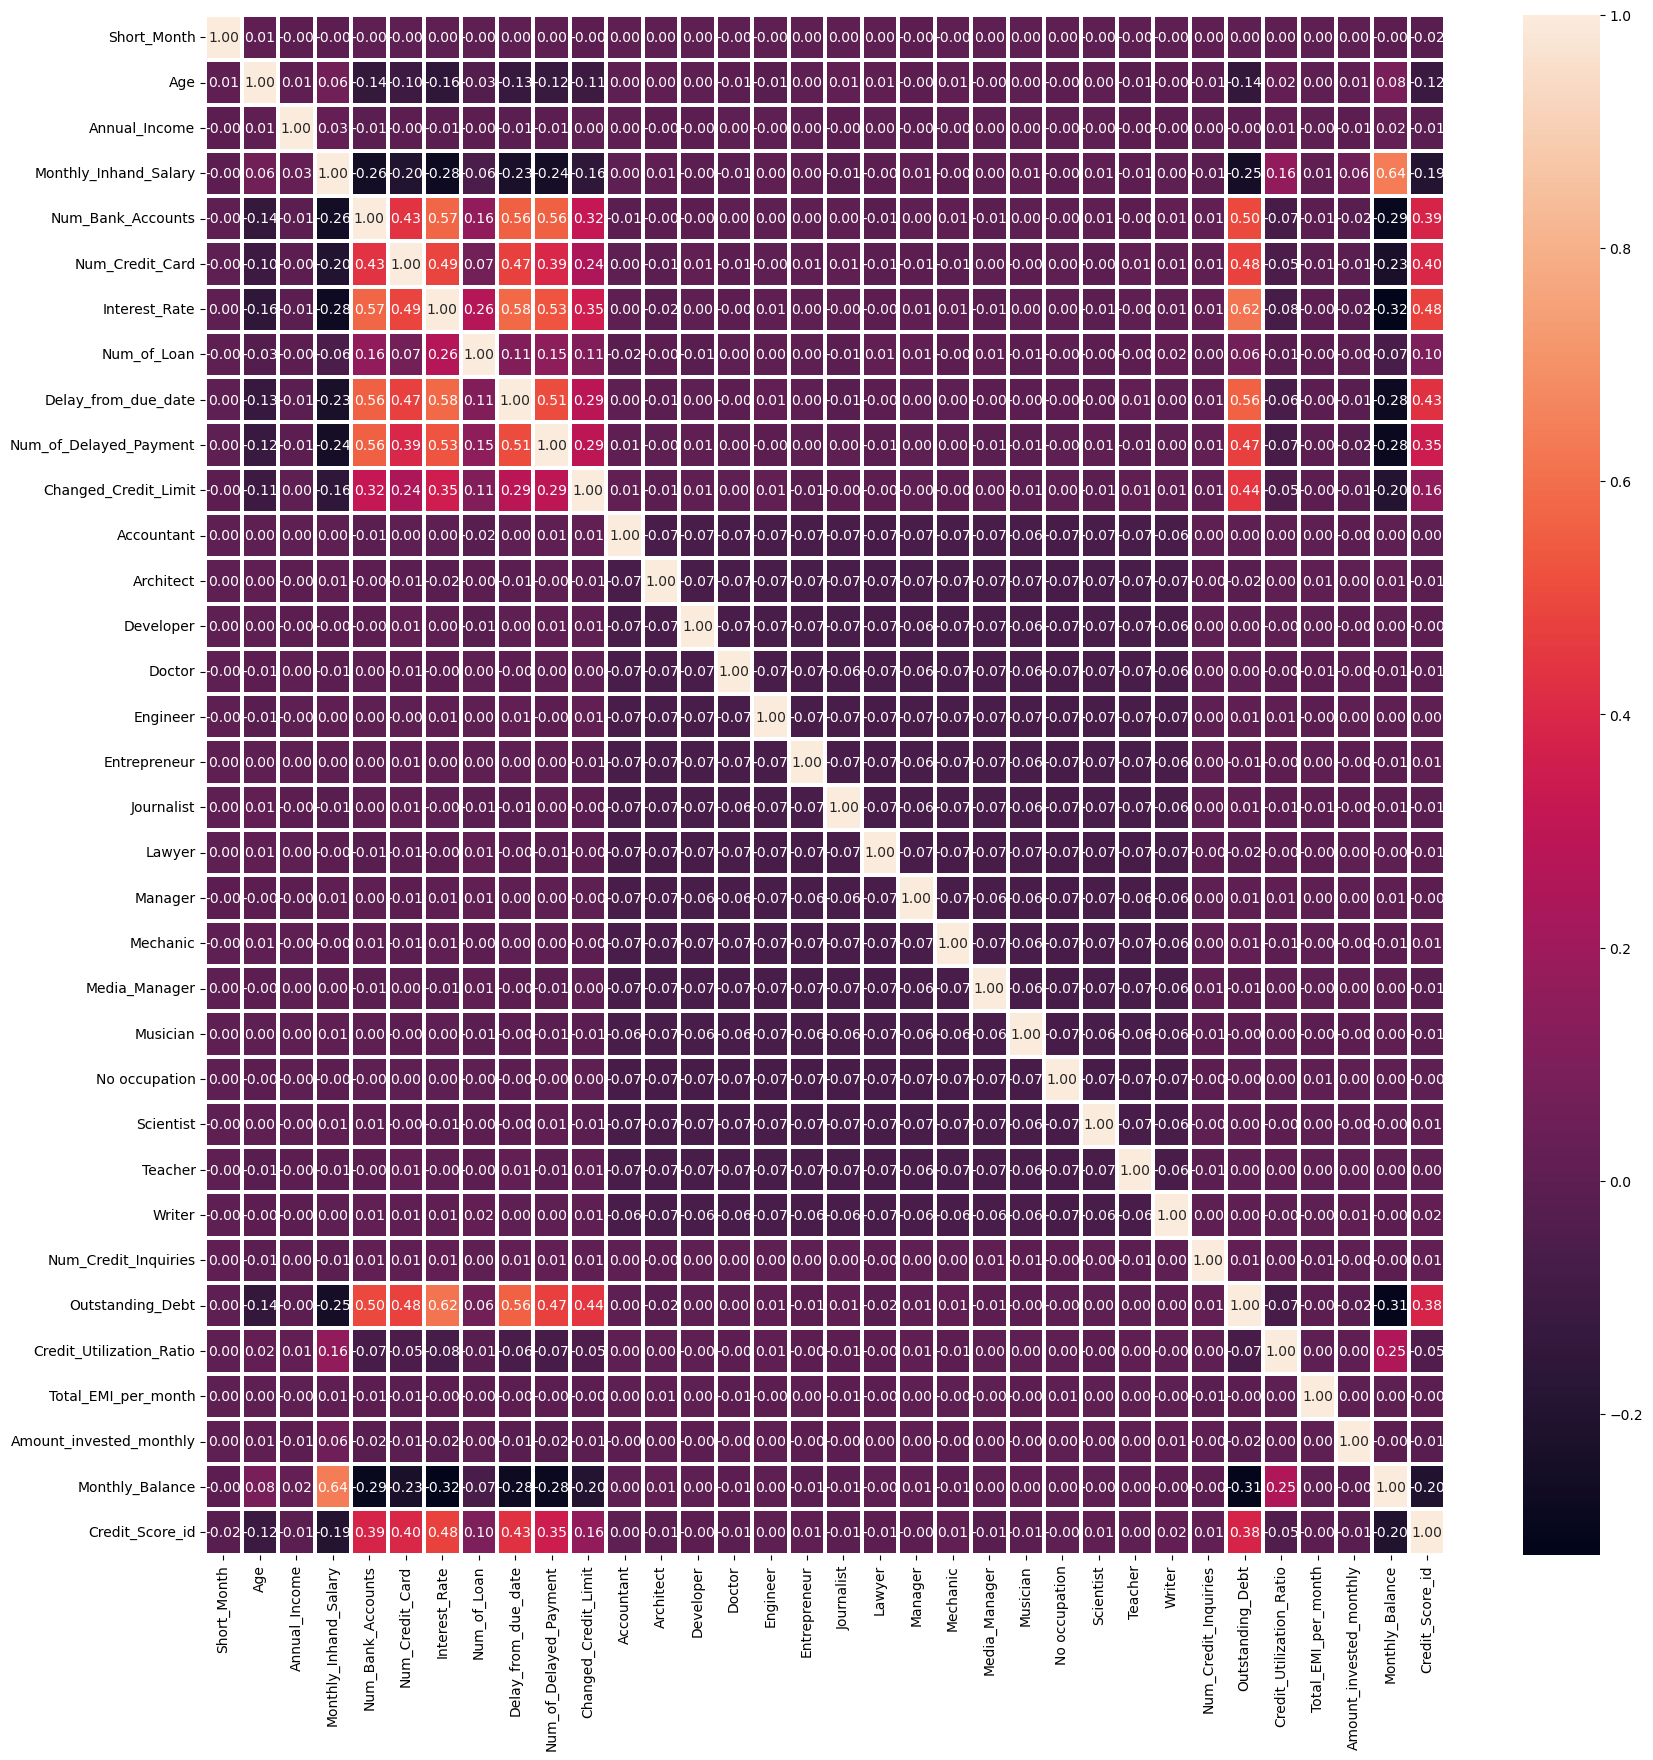

In [323]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

Вывели тепловую карту по все признакам.

После небольшого анализа мы видим зависимости между целевой перемой(Credit_Score_id) и признаками: Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Outstanding_Debt. Такжу проглядывается небольшая зависимость в признаках Num_of_Loan и Changed_Credit_Limit.
Зависимости присутствуют к признаку(Outstanding_Debt) и признаками: Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit.

### Краткий вывод по тепловой карте

Кредитная история зависит от: 
- количестов банковских счетов;
- количество карт;
- процентная ставка;
- задержка платежей по кредитам;
- количество дней задержки платежей;
- Общая сумма кредитов.

In [326]:
sns.pairplot(df_train_processed)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020722711800> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Формирование дата-сета для обучения моделей

In [327]:
# Дата-сет для обучения
X = df_train_processed.drop(['Credit_Mix', 'Credit_History_Age', 'Payment_Behaviour', 'Credit_Score_id'], axis=1)
X.shape

(100000, 33)

In [329]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df_train_processed['Credit_Score_id']

In [331]:
df_train_processed['Credit_Score_id'].value_counts()

Credit_Score_id
2    53174
3    28998
1    17828
Name: count, dtype: int64

In [342]:
df_train_processed['Credit_Score_id'].value_counts(normalize=True)

Credit_Score_id
2   0.53
3   0.29
1   0.18
Name: proportion, dtype: float64

### Modelling

In [334]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [336]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(67000, 33) (33000, 33) (67000,) (33000,)


In [340]:
y_train.value_counts(normalize=True)

Credit_Score_id
2   0.53
3   0.29
1   0.18
Name: proportion, dtype: float64

### KNeighborsClassifier (Классификация ближайших соседей)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
knn_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report( y_test, knn_predict))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, knn_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

### Краткий итог по модели KNeighborsClassifier (Классификация ближайших соседей):
модель не плохо предсказывает по 2-ой(f1-score: 0.71) и 3-ий(f1-score: 0.66) класс, но плохо предсказывает 1-ый(f1-score: 0.49) класс. Модель 1-ый класс предсказывает хуже, чем 50 на 50. Поэтому рассмотри другие модели.

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
%%time

gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
gnb_predict = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, gnb_predict))

In [ ]:
cm = confusion_matrix(y_test, gnb_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

### Краткий итог по модели Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР):
модель не плохо предсказывает по 2-ой(f1-score: 0.62) и 3-ий(f1-score: 0.56) класс, но очень плохо предсказывает 1-ый(f1-score: 0.29) класс. Модель 1-ый класс предсказывает крайне плохо, даже чем KNeighborsClassifier. Поэтому рассмотри другие модели.

### Random Forest Classifier (Классификатор дерева решений)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini', n_estimators = 100, max_depth = 9, random_state = 42, n_jobs = -1)

rfc.fit(X_train, y_train)

In [ ]:
rfc_predict = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc_predict))

In [ ]:
cm = confusion_matrix(y_test, rfc_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

### Краткий итог по модели Random Forest Classifier (Классификатор дерева решений):
модель не плохо предсказывает по 2-ой(f1-score: 0.74) и 3-ий(f1-score: 0.69) класс, но предсказывает 1-ый(f1-score: 0.50) класс 50 на 50, то есть на угад. Пока это модель самая наилучшая, но у нас осталась ещё Логистическая регрессия.

### Logistic Regression (Логистическая регрессия)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

In [ ]:
lr_predict = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, lr_predict))

In [ ]:
cm = confusion_matrix(y_test, lr_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

### Краткий итог по модели Logistic Regression (Логистическая регрессия):
модель не плохо предсказывает по 2-ой(f1-score: 0.70) и 3-ий(f1-score: 0.57) класс, но предсказывает 1-ый(f1-score: 0.47) хуже даже чем наугад. Это модель лучше предсказывает чем: KNeighborsClassifier и Gaussian Naive Bayes, но хуже чем Random Forest Classifier.

# Полный вывод

В данной работе, было сделано:

    - Загружен датасет;
    - Просмотрена статистика;
    - Сделан разведочный анализ;
    - Обработан датасет от аномалей, пустых значений и приведён к цисленному типу;
    - Просмотрены зависимости;
    - Обучены модели;
    - Просмотрен результат предсказаний от разных моделей.

Подводя итоги модели предсказывали лучше все 2-ой и 3-ий класс, 1-ый класс они предсказывали хуже всего. 
Модель, коротая показала лучшие результаты по предсказаниям, оказалась:
- Random Forest Classifier (Классификатор дерева решений);

Random Forest Classifier показала самый найлучший результат по 1-ому классу, а именно f1-score: 0.5.